In [116]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [117]:
df=pd.read_csv("census.csv")  #importing dataset

In [118]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [119]:
df.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [120]:
#Information of the predictor 

more_income=df[df["income"]==">50K"]
less_income=df[df["income"]=="<=50K"]
print("{} people earn more than 50k".format(more_income.shape[0]))
print("{} people earn less than 50k".format(less_income.shape[0]))
print("Percent of people earning more than 50k:",(more_income.shape[0]/df["income"].shape[0])*100)
print("Percent of people earning more than 50k:",(less_income.shape[0]/df["income"].shape[0])*100)

11208 people earn more than 50k
34014 people earn less than 50k
Percent of people earning more than 50k: 24.78439697492371
Percent of people earning more than 50k: 75.21560302507629


### EDA

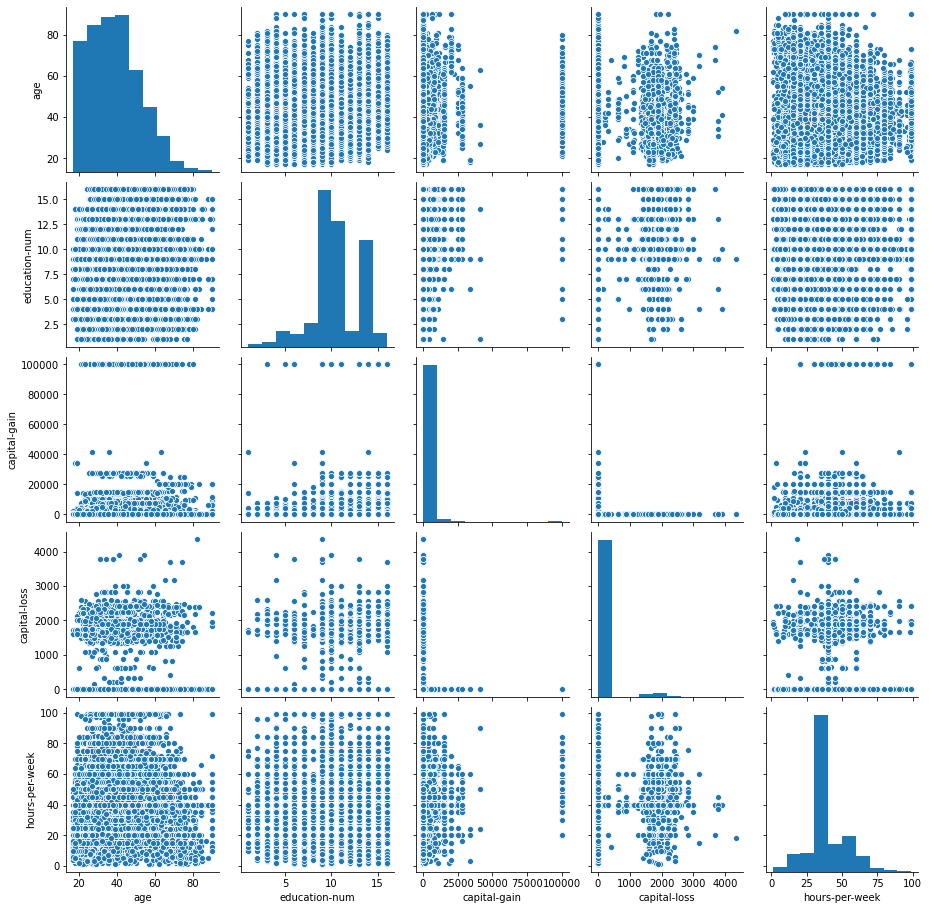

In [121]:
sns.pairplot(df)

#capital-gain and capital-loss are higly skewed and therefore should be transormed through log transformation

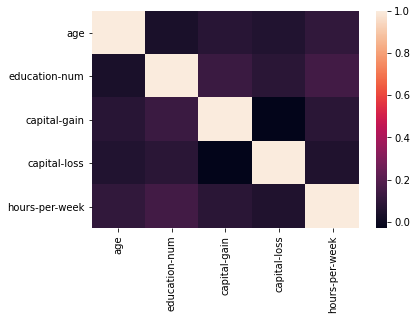

In [122]:
sns.heatmap(df.corr()) # no correlation

In [148]:
income=df['income']

In [151]:
type(income)

pandas.core.series.Series

In [124]:
#income=pd.DataFrame(df['income']) # seperating predictors
df_f=df.drop('income',axis=1) #sepearting feautures

In [129]:
#log transformation for the skewed columns
df_log=pd.DataFrame(df_f)
df_log[['capital-gain','capital-loss']]=df_f[['capital-gain','capital-loss']].apply(lambda x: np.log(x+1))

In [130]:
df_log.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,0.740759,0.355489,40.938017
std,13.217870,2.552881,2.466527,1.595914,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000


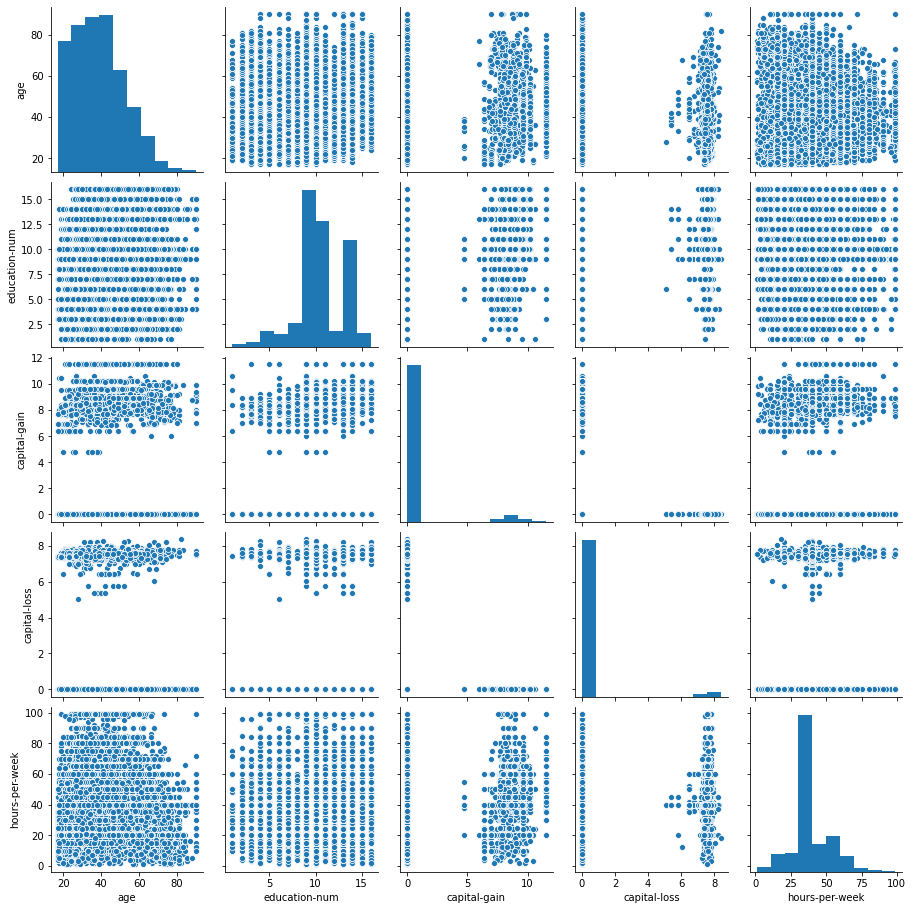

In [92]:
sns.pairplot(df_log)

In [131]:
#scaling all numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']
df_scaler=pd.DataFrame(df_log)
df_scaler[numerical]=scaler.fit_transform(df_scaler[numerical])

In [132]:
df_scaler.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [133]:
# Transforming categorical variables into numerical via one-hot encoding
df_final=pd.get_dummies(df_scaler)

In [134]:
df_final

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [139]:
n=income.shape[0]

In [152]:
# converting the income column into 1's and 0's
i=0
for i in range(n):
    if income[i]=='<=50K':
        income[i]=0
    else:
        income[i]=1

<ipython-input-152-5836f659cd5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income[i]=0
<ipython-input-152-5836f659cd5b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income[i]=1


In [154]:
sum(income)

11208

In [159]:
income=income.astype('int')

In [160]:
# Converting the data into train and test subsets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_final, income,test_size=0.3,random_state=0)                       

In [211]:
# creating a dataframe called results which is to store the results of the models
results=pd.DataFrame(columns=['classifier','train_accuracy','test_accuracy','fscore_train','fscore_test'],index=[1,2,3])

In [ ]:
from sklearn.metrics import fbeta_score, accuracy_score

In [216]:
# function that trains the models and tells the accuracy and f-score
def train_predict(model, X_train, y_train, X_test, y_test,i): 
    lm = model.fit(X_train, y_train)
    predictions_test = lm.predict(X_test)
    predictions_train = lm.predict(X_train)
    results['classifier'][i]= model.__class__.__name__   
    results['train_accuracy'][i] = accuracy_score(y_train, predictions_train)
    results['test_accuracy'][i] = accuracy_score(y_test, predictions_test)
    results['fscore_train'][i] = fbeta_score(y_train, predictions_train, beta=0.5)
    results['fscore_test'][i] = fbeta_score(y_test, predictions_test, beta=0.5)
    return results

In [215]:
# calling functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Initialize the three models
random_state = 42
clf_A = RandomForestClassifier(random_state=random_state)
clf_B = GaussianNB()
clf_C = SVC(random_state=random_state)
i=1
for clf in [clf_A, clf_B, clf_C]:
  
     res = train_predict(clf, X_train, y_train, X_test, y_test,i)
     i=i+1  

In [217]:
 res
    
# both SVC and RandomForest have performed well on the data

,classifier,train_accuracy,test_accuracy,fscore_train,fscore_test
1,RandomForestClassifier,0.973843,0.841454,0.954803,0.679785
2,GaussianNB,0.596557,0.596595,0.425584,0.419991
3,SVC,0.848018,0.839611,0.708061,0.678917


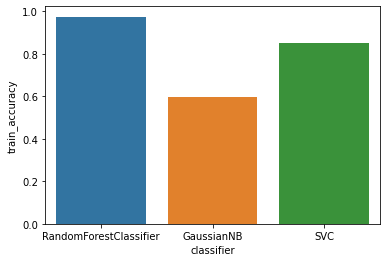

In [226]:
sns.barplot(x='classifier',y='train_accuracy',data=res)

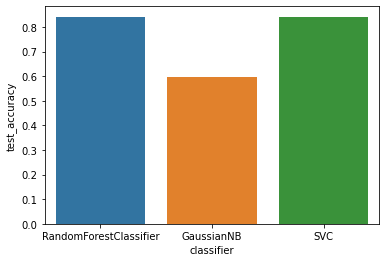

In [228]:
sns.barplot(x='classifier',y='test_accuracy',data=res) 

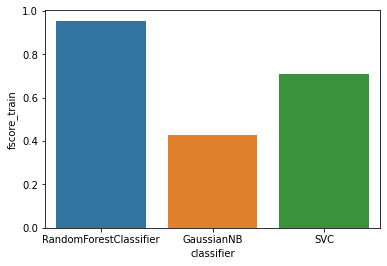

In [229]:
sns.barplot(x='classifier',y='fscore_train',data=res)

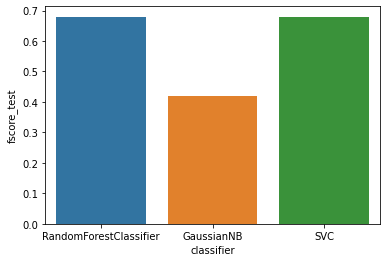

In [230]:
sns.barplot(x='classifier',y='fscore_test',data=res)

In [234]:
# Model tuning through GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
clf = RandomForestClassifier(random_state = 42)
parameters =  {
    'max_depth': [10,20,30,40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150]}
scorer = make_scorer(fbeta_score, beta=0.5)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print("Unoptimized model\n------")
print("Accuracy score on testing data: {}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8415
F-score on testing data: 0.6798

Optimized Model
------
Final accuracy score on the testing data: 0.8454
Final F-score on the testing data: 0.7087


Finally, the model trained above has attained an f score of 0.7087 and accuracy of 0.8454
